### Note

The match statistic is custom-made on https://fcpythonvideocoder.netlify.app/ from this video: https://youtu.be/-t5qGWDdV9w, which is only a match hilight. Keep in mind that this football event will miss a lot of details from the full match.

In [ ]:
pip install mplsoccer

In [ ]:
pip install matplotlib==3.5.2 # This version will be compatible with mplsoccer

In [118]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
# for plotting custom image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "PATH"
events = pd.read_csv(path)

In [120]:
# set general use colours
text_color = 'w'

In [121]:
events

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Home,Toti #24,Shot,20,46,10,58,-,-
1,Home,Lemina #5,Shot,26,28,19,57,-,-
2,Home,Podence #10,Cross,30,54,23,73,12,64
3,Home,Matheus N. #27,Shot,30,58,10,28,-,-
4,Home,Diego Costa #29,Shot,36,31,6,66,-,-
5,Away,Joao Felix #11,Shot,41,43,79,33,-,-
6,Home,Cunha #12,Shot,61,25,94,67,-,-
7,Away,Aubameyang #9,Shot,84,2,7,43,-,-
8,Away,Ben Chilwell #21,Shot,90,58,18,65,-,-


In [122]:
# Player coordinates need to be converted to be compatible with this visualisation
events_90inv = events.copy()
events_90inv.loc[events_90inv['Mins']<45, 'Y']=abs(events_90inv['Y']-100) #fist half -> inverse Y-axis
events_90inv.loc[events_90inv['Mins']>45, 'X']=abs(events_90inv['X']-100) #second half -> inverse both axis
events_90inv.loc[events_90inv['Mins']>45, 'Y']=abs(events_90inv['Y']-100)
events_90inv

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Home,Toti #24,Shot,20,46,10,42,-,-
1,Home,Lemina #5,Shot,26,28,19,43,-,-
2,Home,Podence #10,Cross,30,54,23,27,12,64
3,Home,Matheus N. #27,Shot,30,58,10,72,-,-
4,Home,Diego Costa #29,Shot,36,31,6,34,-,-
5,Away,Joao Felix #11,Shot,41,43,79,67,-,-
6,Home,Cunha #12,Shot,61,25,6,33,-,-
7,Away,Aubameyang #9,Shot,84,2,93,57,-,-
8,Away,Ben Chilwell #21,Shot,90,58,82,35,-,-


In [123]:
firsthalf = events_90inv.loc[events_90inv['Mins']<45]
secondhalf = events_90inv.loc[events_90inv['Mins']>45]
H = events_90inv.loc[events_90inv['Team']=='Home']
A = events_90inv.loc[events_90inv['Team']=='Away']

In [124]:
def plot_football(pX, pY, outlinecolor="black"):
  def getImage(path):
      return OffsetImage(plt.imread(path), zoom=.075, alpha = 1)
  football_path = "file.png"
  football = image.imread(football_path)
  ab = AnnotationBbox(getImage(football_path), (pX,pY), frameon=False)
  ax.add_artist(ab)
  plt.scatter(
      10, 72, s = 155, marker = "o",
      color = outlinecolor, facecolors = "none"
  )
  #plt.imshow(football)
  #plt.show()

Text(43, -4, '8 April 2023')

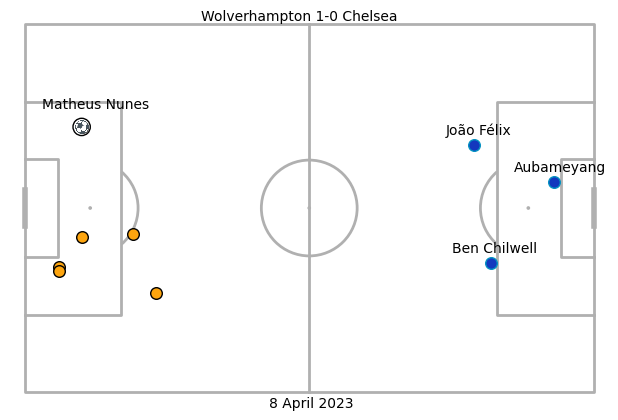

In [140]:
# Draw pitch
pitch = Pitch(pitch_type='opta') 
fig, ax = pitch.draw()

# Plot players
plt.scatter(H['X'], H['Y'], color = "#FDA50F", edgecolor="black", s=70)
plt.scatter(A['X'], A['Y'], color = "#1338BE", edgecolor="#0492C2", s=70)
# Plot custom players name
plt.text(10-7,72+5,"Matheus Nunes")
plt.text(79-5,67+3,"João Félix")
plt.text(93-7,57+3,"Aubameyang")
plt.text(82-7,35+3,"Ben Chilwell")
# Plot goal with custom image.png
plot_football(10,72)
# Add custom text
plt.text(31,101,"Wolverhampton 1-0 Chelsea")
plt.text(43,-4,"8 April 2023")

###Reference
Plotting custom image:
https://fcpython.com/visualisation/creating-scatter-plots-with-club-logos-in-python